<a href="https://colab.research.google.com/github/si-mong/AI_lab/blob/main/AI_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Audio_I/O
###Sample (샘플)
- 소리는 연속적인 아날로그 신호
- 이것을 컴퓨터가 처리하기 위해서는 디지털 형태로 변환해야 하는데, 이 과정에서 일정 시간 간격으로 소리 신호의 진폭(소리의 크기)을 측정하게 된다.
- 이때 측정된 하나의 값이 바로 '샘플'.
- 즉, 샘플은 특정 순간의 소리 신호의 디지털화된 값이라고 봐도 됨.  


###Sample Rate (샘플 레이트)
- '샘플 레이트'는 1초 동안 몇 개의 샘플을 기록하는지를 나타내는 값.
- 단위는 Hz(헤르츠)를 사용.
예를 들어, 샘플 레이트가 16000Hz라면, 1초에 16000개의 샘플을 측정하여 저장한다는 의미.
- 샘플 레이트가 높을수록 더 많은 샘플을 기록하므로 원본 소리 신호에 더 가깝게 디지털화할 수 있다. 이는 더 높은 주파수의 소리까지 기록할 수 있게 되어 오디오의 품질이 좋아짐을 의미한다.
- 일반적인 오디오 샘플 레이트로는 CD 음질인 44100Hz, DVD나 전문가용 오디오에 사용되는 48000Hz, 음성 인식이나 전화 통화에 사용되는 8000Hz 또는 16000Hz 등이 있다.

In [115]:
import torch
import torchaudio
!pip install boto3

In [116]:
import os

audio_dir = 'sample_data/audio_dataset/'
audio_files = [os.path.join(audio_dir, f) for f in os.listdir(audio_dir) if f.endswith('.m4a')]

print("Found audio files:")
for f in audio_files:
    print(f)

Found audio files:
sample_data/audio_dataset/095522039.m4a
sample_data/audio_dataset/095522040.m4a
sample_data/audio_dataset/095522041.m4a
sample_data/audio_dataset/095522042.m4a


##waveform
**waveform(파형)**
- 소리 신호를 시각적으로 나타낸 것
- 시간의 흐름에 따라 압력 변화 (진폭)을 그래프로 그린 것
- 소리의 크기가 어떻게 변하는지 파악할 수 있다.
- **x축**: 시간을 나타냄
- **y축**: 진폭(Amplitude)를 나타낸다.
  - 진폭은 소리의 크기 또는 강도를 의미한다.


`waveform, sample_rate = torchaudio.load(audio_file)`  
- torchaudio 라이브러리를 사용하여 지정된 오디오 파일에서 음성 데이터를 로드하는 역할

- **torchaudio.load(audio_file)**: 이 함수는 audio_file 경로에 있는 음성 파일을 읽어 들인다.  
- **waveform**: 로드된 음성 데이터 자체를 나타냅니다. 일반적으로 PyTorch 텐서 형태로 반환되며, 오디오 신호의 진폭 값을 포함하고 있다. 이 텐서의 형태는 (채널 수, 샘플 수)가 될 수 있습니다. 예를 들어, 스테레오 오디오 파일이라면 채널 수는 2가 된다.
- **sample_rate:** 오디오 파일의 샘플링 속도를 나타냅니다. 샘플링 속도는 초당 몇 개의 오디오 샘플이 기록되었는지를 나타내는 값으로, Hz(헤르츠) 단위로 표현된다. 예를 들어, 16000Hz는 1초에 16000개의 샘플이 있다는 의미다.샘플링 속도는 오디오의 품질과 주파수 범위를 결정하는 중요한 정보다.  

샘플링 속도는 오디오의 품질과 주파수 범위를 결정하는 중요한 정보다.
따라서 이 코드는 audio_file에서 음성 데이터를 로드하여 그 파형 데이터(waveform)와 샘플링 속도(sample_rate)를 각각의 변수에 저장하는 것이다. 이렇게 로드된 데이터는 이후에 분석하거나 시각화하는 데 사용될 수 있다.

In [117]:
import matplotlib.pyplot as plt
import torch

# plot_waveform 함수 정의
def plot_waveform(waveform, sample_rate, title="Waveform"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.xlabel("Time [sec]")
    plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

# Note: plt.show() is typically called outside the plotting function


Processing: sample_data/audio_dataset/095522039.m4a


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r

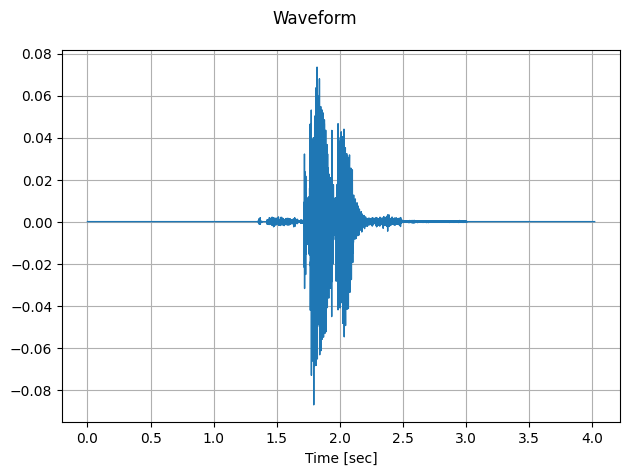


Processing: sample_data/audio_dataset/095522040.m4a


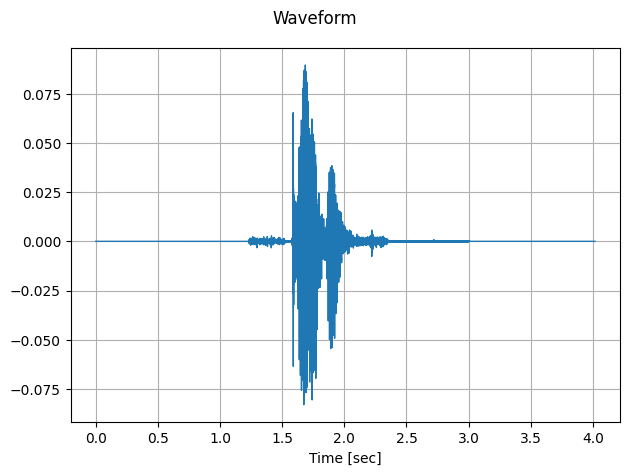


Processing: sample_data/audio_dataset/095522041.m4a


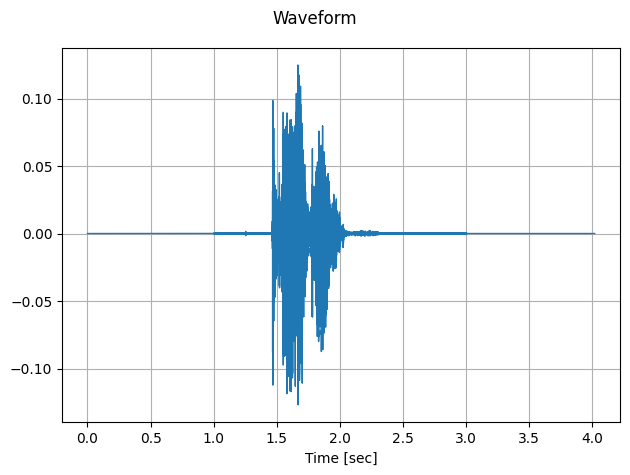


Processing: sample_data/audio_dataset/095522042.m4a


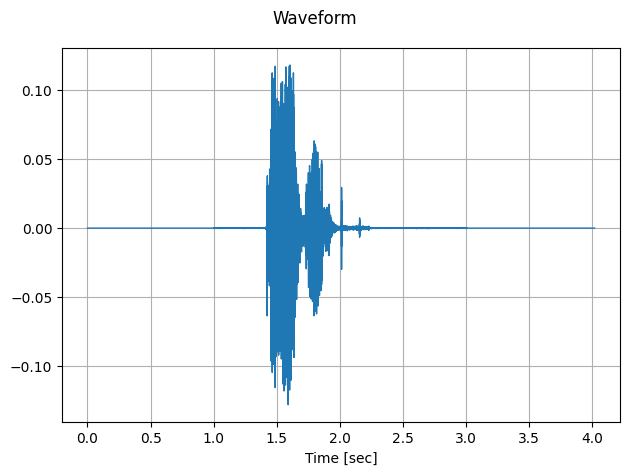

In [118]:
for audio_file in audio_files:
    try:
        waveform, sample_rate = torchaudio.load(audio_file)

        print(f"\nProcessing: {audio_file}")
        plot_waveform(waveform, sample_rate) # plot_waveform 함수 호출
        plt.show() # 플롯 표시

    except Exception as e:
        print(f"Error processing {audio_file}: {e}")

##spectrogram
스펙트로그램은 오디오 신호의 주파수 성분이 시간의 흐름에 따라 어떻게 변하는지를 시각적으로 나타낸 그래프이다. waveform이 소리의 크기 변화를 시간 축으로 보여준다면, 스펙트로그램은 소리의 높낮이(주파수)와 강도(색상 또는 밝기) 변화를 시간 축과 주파수 축으로 동시에 보여준다.  
- **X축**: 시간을 나타낸다.
- **Y축**: 주파수를 나타냅니다. 낮은 주파수는 아래쪽에, 높은 주파수는 위쪽에 표시된다.
- **색상 또는 밝기**: 특정 시간과 주파수에서의 소리의 강도(에너지 또는 진폭)를 나타냅니다. 일반적으로 색상이 밝거나 진할수록 해당 주파수 성분의 소리가 강하다는 의미다.
스펙트로그램을 통해 다음과 같은 정보를 파악할 수 있다.

- **음색(Timbre)**: 소리의 고유한 특성. 특정 주파수 성분이 시간에 따라 어떻게 분포하고 변하는지를 통해 악기 소리, 사람 목소리 등의 음색을 구분할 수 있다.
- **소리의 변화**: 시간에 따라 소리의 높낮이(주파수)나 크기(강도)가 어떻게 변하는지 한눈에 볼 수 있다. 예를 들어, 음이 올라가거나 내려가는 것을 스펙트로그램에서 주파수 축의 변화로 확인할 수 있다.
- **배경 소음 분석**: 특정 주파수 대역에 지속적으로 나타나는 패턴을 통해 배경 소음을 식별하거나 제거하는 데 활용될 수 있다.

In [119]:
import matplotlib.pyplot as plt
import torchaudio.transforms as T
import torch

# plot_specgram 함수 정의
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    # Assuming mono or taking the first channel if stereo
    waveform = waveform.mean(dim=0) if waveform.shape[0] > 1 else waveform.squeeze()

    spectrogram = T.Spectrogram(n_fft=1024)(waveform)
    spectrogram = spectrogram.log2()

    plt.figure()
    plt.imshow(spectrogram, origin="lower", aspect="auto", interpolation="nearest", cmap="viridis")
    plt.title(title)
    plt.xlabel("Frame")
    plt.ylabel("Freq bin")
    plt.colorbar(format="%+2.0f dB")
    plt.tight_layout() # Adjust layout


Processing: sample_data/audio_dataset/095522039.m4a


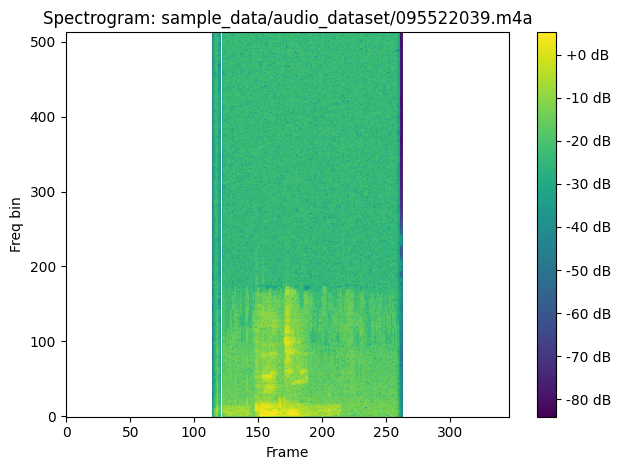


Processing: sample_data/audio_dataset/095522040.m4a


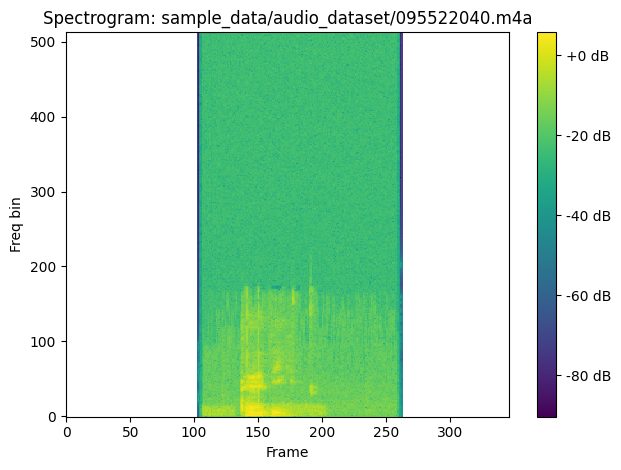


Processing: sample_data/audio_dataset/095522041.m4a


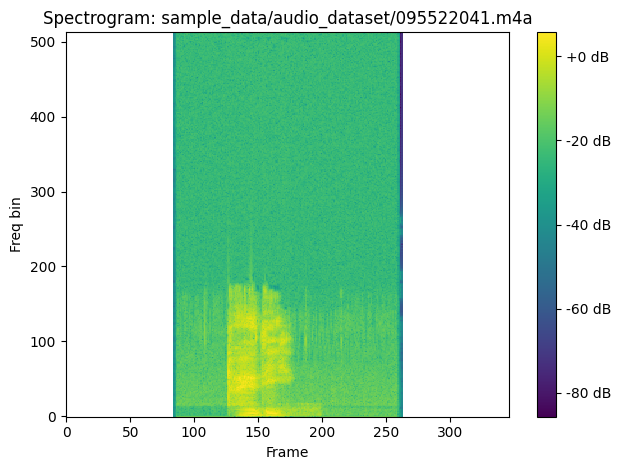


Processing: sample_data/audio_dataset/095522042.m4a


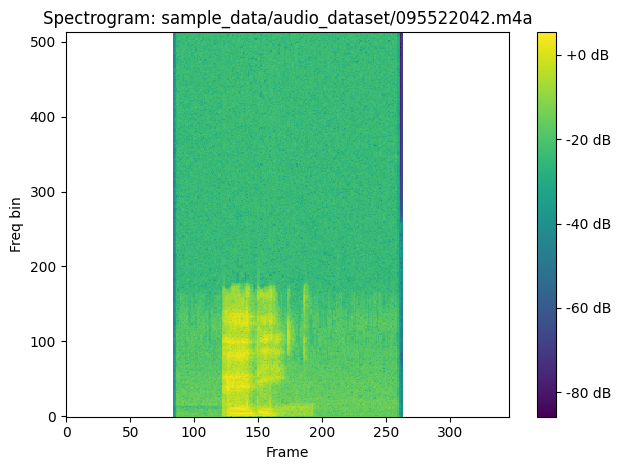

In [120]:
for audio_file in audio_files:
    try:
        waveform, sample_rate = torchaudio.load(audio_file)

        print(f"\nProcessing: {audio_file}")
        plot_specgram(waveform, sample_rate, title=f"Spectrogram: {audio_file}")
        plt.show() # Display the plots for each file

    except Exception as e:
        print(f"Error processing {audio_file}: {e}")

모델이 학습하기 쉽게 처리하는거?
주파수를 올리기도 하고 내리기도 함  
ekdnstoavmf 48->44.1는 해볼 필요 없음  
데이터를 전처리 하는 단계
#audio resample

- 오디오 리샘플링: 오디오 신호의 샘플 레이트(Sample Rate), 즉 1초 동안 소리를 몇 번 측정했는지 그 '횟수'를 변경하는 과정  
###Why?
- 서로 다른 샘플 레이트를 가진 오디오 파일들을 하나의 샘플 레이트로 통일해야 할 때 (예: 여러 오디오 데이터를 모아 학습시킬 때).
- 특정 샘플 레이트를 요구하는 장치나 소프트웨어에 오디오를 맞출 때.
- 파일 크기를 줄이거나 품질을 높이고 싶을 때 (다운/업샘플링).
###How?
- 단순히 샘플을 추가하거나 제거하는 것이 아니라, 복잡한 수학적 계산(필터링, 보간)을 통해 원본 신호의 정보를 최대한 유지하면서 샘플 레이트를 바꾼다. 이 과정의 품질이 중요하다.

In [121]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

2.8.0+cu126
2.8.0+cu126


In [122]:
import math
import timeit

import librosa
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
!pip install resampy
from IPython.display import Audio

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

DEFAULT_OFFSET = 201


def _get_log_freq(sample_rate, max_sweep_rate, offset):
    """Get freqs evenly spaced out in log-scale, between [0, max_sweep_rate // 2]

    offset is used to avoid negative infinity `log(offset + x)`.

    """
    start, stop = math.log(offset), math.log(offset + max_sweep_rate // 2)
    return torch.exp(torch.linspace(start, stop, sample_rate, dtype=torch.double)) - offset


def _get_inverse_log_freq(freq, sample_rate, offset):
    """Find the time where the given frequency is given by _get_log_freq"""
    half = sample_rate // 2
    return sample_rate * (math.log(1 + freq / offset) / math.log(1 + half / offset))


def _get_freq_ticks(sample_rate, offset, f_max):
    # Given the original sample rate used for generating the sweep,
    # find the x-axis value where the log-scale major frequency values fall in
    times, freq = [], []
    for exp in range(2, 5):
        for v in range(1, 10):
            f = v * 10**exp
            if f < sample_rate // 2:
                t = _get_inverse_log_freq(f, sample_rate, offset) / sample_rate
                times.append(t)
                freq.append(f)
    t_max = _get_inverse_log_freq(f_max, sample_rate, offset) / sample_rate
    times.append(t_max)
    freq.append(f_max)
    return times, freq


def get_sine_sweep(sample_rate, offset=DEFAULT_OFFSET):
    max_sweep_rate = sample_rate
    freq = _get_log_freq(sample_rate, max_sweep_rate, offset)
    delta = 2 * math.pi * freq / sample_rate
    cummulative = torch.cumsum(delta, dim=0)
    signal = torch.sin(cummulative).unsqueeze(dim=0)
    return signal


def plot_sweep(
    waveform,
    sample_rate,
    title,
    max_sweep_rate=48000,
    offset=DEFAULT_OFFSET,
):
    x_ticks = [100, 500, 1000, 5000, 10000, 20000, max_sweep_rate // 2]
    y_ticks = [1000, 5000, 10000, 20000, sample_rate // 2]

    time, freq = _get_freq_ticks(max_sweep_rate, offset, sample_rate // 2)
    freq_x = [f if f in x_ticks and f <= max_sweep_rate // 2 else None for f in freq]
    freq_y = [f for f in freq if f in y_ticks and 1000 <= f <= sample_rate // 2]

    figure, axis = plt.subplots(1, 1)
    _, _, _, cax = axis.specgram(waveform[0].numpy(), Fs=sample_rate)
    plt.xticks(time, freq_x)
    plt.yticks(freq_y, freq_y)
    axis.set_xlabel("Original Signal Frequency (Hz, log scale)")
    axis.set_ylabel("Waveform Frequency (Hz)")
    axis.xaxis.grid(True, alpha=0.67)
    axis.yaxis.grid(True, alpha=0.67)
    figure.suptitle(f"{title} (sample rate: {sample_rate} Hz)")
    plt.colorbar(cax)

In [123]:
import resampy

print(f"torchaudio: {torchaudio.__version__}")
print(f"librosa: {librosa.__version__}")
print(f"resampy: {resampy.__version__}")

torchaudio: 2.8.0+cu126
librosa: 0.11.0
resampy: 0.4.3


In [124]:
def benchmark_resample_functional(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=6,
    rolloff=0.99,
    resampling_method="sinc_interp_hann",
    beta=None,
    iters=5,
):
    return (
        timeit.timeit(
            stmt="""
torchaudio.functional.resample(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=lowpass_filter_width,
    rolloff=rolloff,
    resampling_method=resampling_method,
    beta=beta,
)
        """,
            setup="import torchaudio",
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

In [125]:
def benchmark_resample_transforms(
    waveform,
    sample_rate,
    resample_rate,
    lowpass_filter_width=6,
    rolloff=0.99,
    resampling_method="sinc_interp_hann",
    beta=None,
    iters=5,
):
    return (
        timeit.timeit(
            stmt="resampler(waveform)",
            setup="""
import torchaudio

resampler = torchaudio.transforms.Resample(
    sample_rate,
    resample_rate,
    lowpass_filter_width=lowpass_filter_width,
    rolloff=rolloff,
    resampling_method=resampling_method,
    dtype=waveform.dtype,
    beta=beta,
)
resampler.to(waveform.device)
        """,
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

In [126]:
def benchmark_resample_librosa(
    waveform,
    sample_rate,
    resample_rate,
    res_type=None,
    iters=5,
):
    waveform_np = waveform.squeeze().numpy()
    return (
        timeit.timeit(
            stmt="""
librosa.resample(
    waveform_np,
    orig_sr=sample_rate,
    target_sr=resample_rate,
    res_type=res_type,
)
        """,
            setup="import librosa",
            number=iters,
            globals=locals(),
        )
        * 1000
        / iters
    )

In [127]:
def benchmark(waveform, sample_rate, resample_rate):
    times, rows = [], []
    # waveform = get_sine_sweep(sample_rate).to(torch.float32) # Remove sine sweep generation

    args = (waveform, sample_rate, resample_rate)

    # sinc 64 zero-crossings
    f_time = benchmark_resample_functional(*args, lowpass_filter_width=64)
    t_time = benchmark_resample_transforms(*args, lowpass_filter_width=64)
    times.append([None, f_time, t_time])
    rows.append("sinc (width 64)")

    # sinc 16 zero-crossings
    f_time = benchmark_resample_functional(*args, lowpass_filter_width=16)
    t_time = benchmark_resample_transforms(*args, lowpass_filter_width=16)
    times.append([None, f_time, t_time])
    rows.append("sinc (width 16)")

    # kaiser best
    kwargs = {
        "lowpass_filter_width": 64,
        "rolloff": 0.9475937167399596,
        "resampling_method": "sinc_interp_kaiser",
        "beta": 14.769656459379492,
    }
    lib_time = benchmark_resample_librosa(waveform, sample_rate, resample_rate, res_type="kaiser_best") # Pass waveform and sample_rate
    f_time = benchmark_resample_functional(*args, **kwargs)
    t_time = benchmark_resample_transforms(*args, **kwargs)
    times.append([lib_time, f_time, t_time])
    rows.append("kaiser_best")

    # kaiser fast
    kwargs = {
        "lowpass_filter_width": 16,
        "rolloff": 0.85,
        "resampling_method": "sinc_interp_kaiser",
        "beta": 8.555504641634386,
    }
    lib_time = benchmark_resample_librosa(waveform, sample_rate, resample_rate, res_type="kaiser_fast") # Pass waveform and sample_rate
    f_time = benchmark_resample_functional(*args, **kwargs)
    t_time = benchmark_resample_transforms(*args, **kwargs)
    times.append([lib_time, f_time, t_time])
    rows.append("kaiser_fast")

    df = pd.DataFrame(times, columns=["librosa", "functional", "transforms"], index=rows)
    return df

In [128]:
def plot(df):
    print(df.round(2))
    ax = df.plot(kind="bar")
    plt.ylabel("Time Elapsed [ms]")
    plt.xticks(rotation=0, fontsize=10)
    for cont, col, color in zip(ax.containers, df.columns, mcolors.TABLEAU_COLORS):
        label = ["N/A" if v != v else str(v) for v in df[col].round(2)]
        ax.bar_label(cont, labels=label, color=color, fontweight="bold", fontsize="x-small")

##Downsample
- 오디오 리샘플링 과정 중 샘플 레이트를 원래보다 더 낮은 값으로 줄이는 것이다.
- 예시: 44,100Hz 오디오를 8,000Hz (전화 통화 음질)로 만드는 것.
###why?
- 오디오 파일의 크기를 줄여 저장 공간이나 전송 대역폭을 아낄 때.
- 낮은 샘플 레이트만 지원하는 시스템에서 오디오를 사용할 때.
- 사람 목소리처럼 상대적으로 낮은 주파수 대역 정보만 중요한 경우 (고주파수 정보를 버려도 되는 경우).
###주의할 점
- 샘플 수를 줄이는 과정에서 원본 신호의 고주파수 정보가 필연적으로 손실된다.
- 또한, '앨리어싱'이라는 현상이 발생하지 않도록 다운샘플링 전에 저역 통과 필터를 반드시 적용해야 한다.
###앨리어싱 (aliasing)
- 앨리어싱: 소리 신호를 디지털화(샘플링)할 때, 실제 높은 주파수 소리가 잘못 측정되어 낮은 주파수 소리처럼 왜곡되어 나타나는 현상이다. (원본에 없던 가짜 소리 발생)
- 발생 원인: 1초에 측정하는 횟수(샘플 레이트)가 소리의 주파수 변화를 제대로 따라가지 못할 때 발생한다.
- 해결법: 특히 다운샘플링 시에는 샘플 레이트를 낮추기 전에, 들릴 필요 없는 높은 주파수 소리를 미리 제거하는 필터(저역 통과 필터)를 사용한다.


--- Benchmarking Downsampling for sample_data/audio_dataset/095522039.m4a (Original SR: 44100 Hz -> Target SR: 8000 Hz) ---
                 librosa  functional  transforms
sinc (width 64)      NaN        2.71        1.55
sinc (width 16)      NaN        1.85        0.95
kaiser_best       206.06       12.40        2.49
kaiser_fast        59.46        7.42        1.65


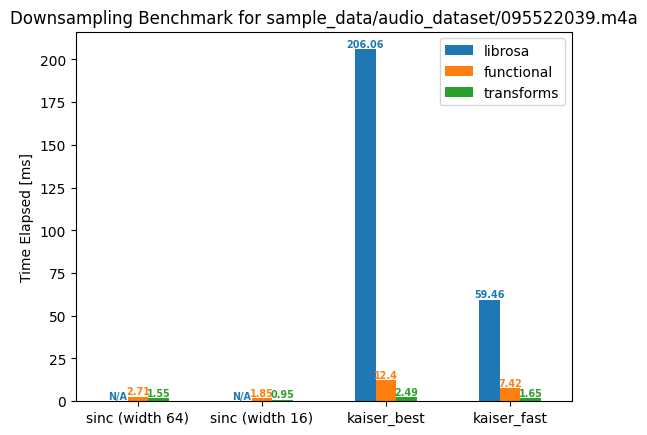

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r


--- Benchmarking Downsampling for sample_data/audio_dataset/095522040.m4a (Original SR: 44100 Hz -> Target SR: 8000 Hz) ---
                 librosa  functional  transforms
sinc (width 64)      NaN        3.98        2.27
sinc (width 16)      NaN        2.50        1.44
kaiser_best       299.15       11.81        2.65
kaiser_fast        83.12        7.61        1.67


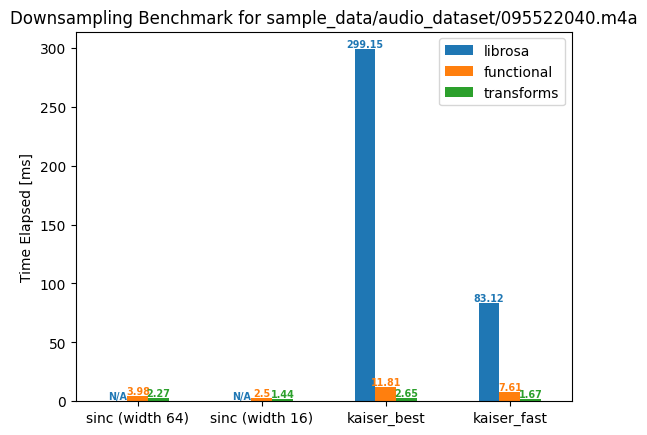

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r


--- Benchmarking Downsampling for sample_data/audio_dataset/095522041.m4a (Original SR: 44100 Hz -> Target SR: 8000 Hz) ---
                 librosa  functional  transforms
sinc (width 64)      NaN        5.49        2.23
sinc (width 16)      NaN        2.35        1.49
kaiser_best       271.40       15.20        6.31
kaiser_fast        91.92        8.44        1.61


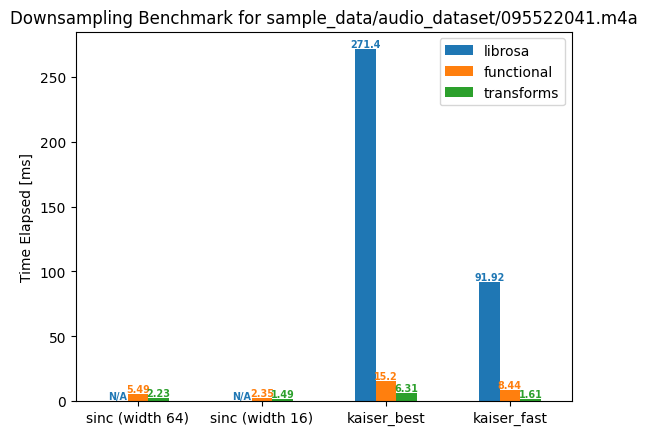

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r


--- Benchmarking Downsampling for sample_data/audio_dataset/095522042.m4a (Original SR: 44100 Hz -> Target SR: 8000 Hz) ---
                 librosa  functional  transforms
sinc (width 64)      NaN        7.93        9.84
sinc (width 16)      NaN        7.65        5.58
kaiser_best       544.90       11.69        2.48
kaiser_fast        59.63        7.18        1.53


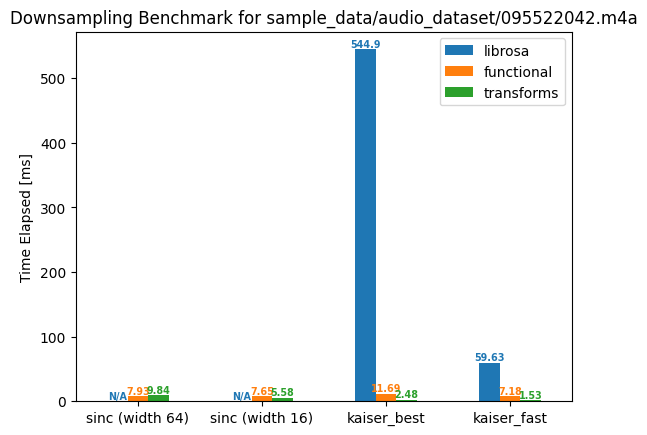

In [129]:
# Iterate through audio files and perform downsampling benchmark with actual sample rates
for audio_file in audio_files:
    try:
        waveform, sample_rate = torchaudio.load(audio_file) # Load actual waveform and sample rate
        # Determine target downsample rate. For simplicity, let's target 8000 Hz if original is higher.
        downsample_rate = 8000 if sample_rate > 8000 else sample_rate

        print(f"\n--- Benchmarking Downsampling for {audio_file} (Original SR: {sample_rate} Hz -> Target SR: {downsample_rate} Hz) ---")
        df_downsample = benchmark(waveform, sample_rate, downsample_rate) # Use actual waveform and sample rates
        plot(df_downsample)
        plt.title(f"Downsampling Benchmark for {audio_file}") # Add title to plot
        plt.show()

    except Exception as e:
        print(f"Error processing {audio_file} for downsampling benchmark: {e}")

##Upsample
- 오디오 리샘플링 과정 중 샘플 레이트를 원래보다 더 높은 값으로 늘리는 것이다.
- 예시: 16,000Hz 오디오를 44,100Hz (CD 음질)로 만든다.
###why?
- 저품질 오디오의 샘플 레이트를 높여서 고품질 시스템에서 재생할 때.
- 더 높은 주파수 대역의 정보를 활용해야 하는 분석이나 처리를 수행할 때.
###주의할 점
- 새로운 샘플들을 '예측'해서 채워 넣는 과정이므로, 원본에 없던 고주파수 노이즈가 생기지 않도록 신중하게 처리해야 한다.

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r


--- Benchmarking Upsampling for sample_data/audio_dataset/095522039.m4a (Original SR: 44100 Hz -> Target SR: 48000 Hz) ---
                 librosa  functional  transforms
sinc (width 64)      NaN        2.59        1.74
sinc (width 16)      NaN        1.93        1.46
kaiser_best       224.56        8.60        4.14
kaiser_fast        82.57       10.15        2.44


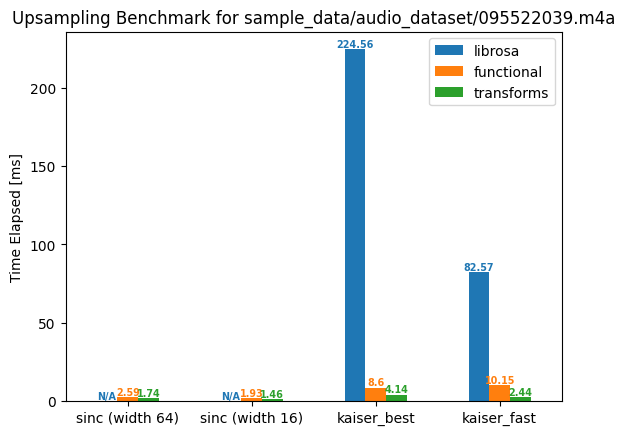

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r


--- Benchmarking Upsampling for sample_data/audio_dataset/095522040.m4a (Original SR: 44100 Hz -> Target SR: 48000 Hz) ---
                 librosa  functional  transforms
sinc (width 64)      NaN        6.69        3.99
sinc (width 16)      NaN        4.45        2.60
kaiser_best       352.92        8.13        2.93
kaiser_fast        81.51        5.82        7.35


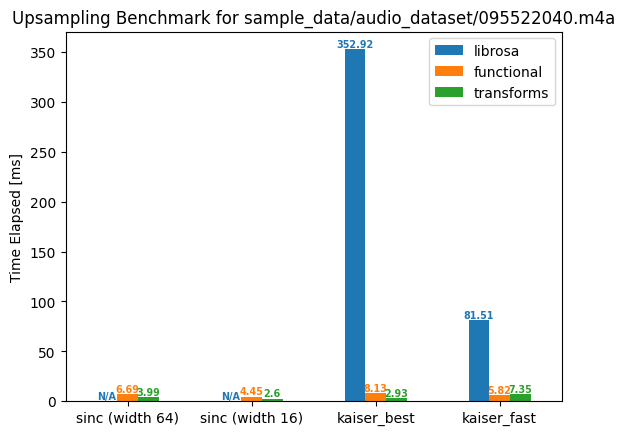

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r


--- Benchmarking Upsampling for sample_data/audio_dataset/095522041.m4a (Original SR: 44100 Hz -> Target SR: 48000 Hz) ---
                 librosa  functional  transforms
sinc (width 64)      NaN        7.66        7.33
sinc (width 16)      NaN        6.06        2.59
kaiser_best       354.77        8.41        3.06
kaiser_fast        92.76       10.57        7.14


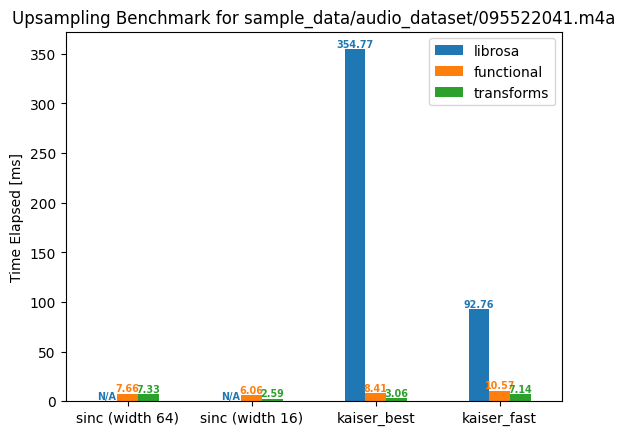

/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:88: UserWarning: torio.io._streaming_media_decoder.StreamingMediaDecoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be r


--- Benchmarking Upsampling for sample_data/audio_dataset/095522042.m4a (Original SR: 44100 Hz -> Target SR: 48000 Hz) ---
                 librosa  functional  transforms
sinc (width 64)      NaN        5.16        2.86
sinc (width 16)      NaN        2.89        2.23
kaiser_best       209.80        5.61        1.85
kaiser_fast        47.44        4.23        1.49


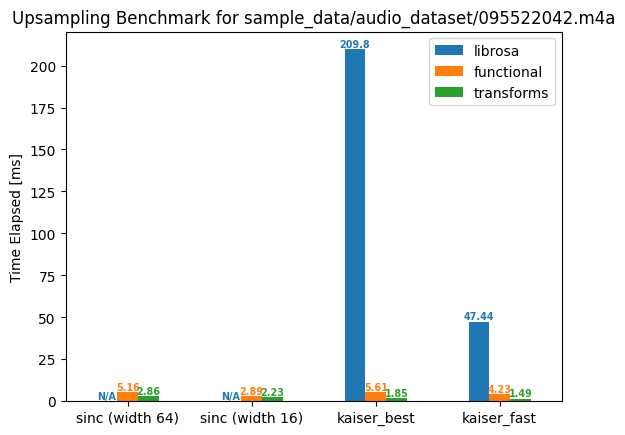

In [130]:
# Iterate through audio files and perform upsampling benchmark with actual sample rates
for audio_file in audio_files:
    try:
        waveform, sample_rate = torchaudio.load(audio_file) # Load actual waveform and sample rate
        # Determine target upsample rate. For simplicity, let's target 48000 Hz if original is lower.
        upsample_rate = 48000 if sample_rate < 48000 else sample_rate

        print(f"\n--- Benchmarking Upsampling for {audio_file} (Original SR: {sample_rate} Hz -> Target SR: {upsample_rate} Hz) ---")
        df_upsample = benchmark(waveform, sample_rate, upsample_rate) # Use actual waveform and sample rates
        plot(df_upsample)
        plt.title(f"Upsampling Benchmark for {audio_file}") # Add title to plot
        plt.show()

    except Exception as e:
        print(f"Error processing {audio_file} for upsampling benchmark: {e}")